In [1]:
#import required packages
import boto3
import requests
import json
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Check s3 for files

In [2]:
# Create an S3 client
s3 = boto3.client('s3')

# List objects with the prefix
response = s3.list_objects_v2(Bucket='ecogridaidata', Prefix='eia_electricity/')

# Print the file keys
for obj in response.get('Contents', []):
    print(obj['Key'])

eia_electricity/eia_data_demand_20250324_225715.json
eia_electricity/eia_data_demand_20250325_021240.json
eia_electricity/eia_data_energy_source_20250323_200432.json
eia_electricity/eia_data_neighboring_bal_20250324_224805.json
eia_electricity/eia_data_subregion_20250323_191441.json
eia_electricity/eia_data_subregion_20250325_021741.json


## Load data stored as a json file in s3 "ecogridaidata" into a dataframe for verification and processing

In [3]:
#define bucket name
bucket = 'ecogridaidata'

# S3 path to your file
s3_uri = "eia_electricity/eia_data_subregion_20250323_191441.json"
s3_uri2 = "eia_electricity/eia_data_energy_source_20250323_200432.json"
s3_uri3 = "eia_electricity/eia_data_neighboring_bal_20250324_224805.json"
s3_uri4 = "eia_electricity/eia_data_demand_20250324_225715.json"

#load JSON from the s3
def load_json_from_s3(key):
    response = s3.get_object(Bucket=bucket, Key=key)
    return pd.read_json(response['Body'])

In [4]:
df_subregion = load_json_from_s3(s3_uri)
df_energysource = load_json_from_s3(s3_uri2)
df_neighbor_bal = load_json_from_s3(s3_uri3)
df_demand = load_json_from_s3(s3_uri4)

# Preview
df_subregion.head()

,period,subba,subba-name,parent,parent-name,timezone,value,value-units
0,2024-12-31,PGAE,Pacific Gas and Electric,CISO,California Independent System Operator,Arizona,247213,megawatthours
1,2024-12-31,PGAE,Pacific Gas and Electric,CISO,California Independent System Operator,Central,247876,megawatthours
2,2024-12-31,PGAE,Pacific Gas and Electric,CISO,California Independent System Operator,Eastern,248481,megawatthours
3,2024-12-31,PGAE,Pacific Gas and Electric,CISO,California Independent System Operator,Mountain,247213,megawatthours
4,2024-12-31,PGAE,Pacific Gas and Electric,CISO,California Independent System Operator,Pacific,246697,megawatthours


In [5]:
df_energysource.head()

,period,respondent,respondent-name,fueltype,type-name,timezone,timezone-description,value,value-units
0,2024-12-31,AECI,"Associated Electric Cooperative, Inc.",COL,Coal,Arizona,Arizona,23782,megawatthours
1,2024-12-31,AECI,"Associated Electric Cooperative, Inc.",COL,Coal,Central,Central,23309,megawatthours
2,2024-12-31,AECI,"Associated Electric Cooperative, Inc.",COL,Coal,Eastern,Eastern,22893,megawatthours
3,2024-12-31,AECI,"Associated Electric Cooperative, Inc.",COL,Coal,Mountain,Mountain,23782,megawatthours
4,2024-12-31,AECI,"Associated Electric Cooperative, Inc.",COL,Coal,Pacific,Pacific,24422,megawatthours


In [6]:
df_neighbor_bal.head()

,period,fromba,fromba-name,toba,toba-name,timezone,value,value-units
0,2024-12-31,AECI,"Associated Electric Cooperative, Inc.",MISO,"Midcontinent Independent System Operator, Inc.",Arizona,584,megawatthours
1,2024-12-31,AECI,"Associated Electric Cooperative, Inc.",MISO,"Midcontinent Independent System Operator, Inc.",Central,359,megawatthours
2,2024-12-31,AECI,"Associated Electric Cooperative, Inc.",MISO,"Midcontinent Independent System Operator, Inc.",Eastern,321,megawatthours
3,2024-12-31,AECI,"Associated Electric Cooperative, Inc.",MISO,"Midcontinent Independent System Operator, Inc.",Mountain,584,megawatthours
4,2024-12-31,AECI,"Associated Electric Cooperative, Inc.",MISO,"Midcontinent Independent System Operator, Inc.",Pacific,1111,megawatthours


In [7]:
df_demand.head()

,period,respondent,respondent-name,type,type-name,timezone,timezone-description
0,2025-03-24,AECI,"Associated Electric Cooperative, Inc.",DF,Day-ahead demand forecast,Central,Central
1,2025-03-24,AECI,"Associated Electric Cooperative, Inc.",DF,Day-ahead demand forecast,Eastern,Eastern
2,2025-03-24,AVA,Avista Corporation,DF,Day-ahead demand forecast,Arizona,Arizona
3,2025-03-24,AVA,Avista Corporation,DF,Day-ahead demand forecast,Central,Central
4,2025-03-24,AVA,Avista Corporation,DF,Day-ahead demand forecast,Eastern,Eastern


## Data Exploration

In [8]:
for name, df in zip(
    ['Subregion', 'Energy Source', 'Neighbor Balancing', 'Demand'],
    [df_subregion, df_energysource, df_neighbor_bal, df_demand]
):
    print(f"\n=== {name} Dataset ===")
    print("Shape:", df.shape)
    print("Null values:\n", df.isnull().sum())
    print("Data types:\n", df.dtypes)


=== Subregion Dataset ===
Shape: (302719, 8)
Null values:
 period         0
subba          0
subba-name     0
parent         0
parent-name    0
timezone       0
value          0
value-units    0
dtype: int64
Data types:
 period         object
subba          object
subba-name     object
parent         object
parent-name    object
timezone       object
value           int64
value-units    object
dtype: object

=== Energy Source Dataset ===
Shape: (1425802, 9)
Null values:
 period                  0
respondent              0
respondent-name         0
fueltype                0
type-name               0
timezone                0
timezone-description    0
value                   0
value-units             0
dtype: int64
Data types:
 period                  object
respondent              object
respondent-name         object
fueltype                object
type-name               object
timezone                object
timezone-description    object
value                    int64
value-units    

In [9]:
dfs = [df_subregion, df_energysource, df_neighbor_bal, df_demand]
for df in dfs:
    df['period'] = pd.to_datetime(df['period'])

for name, df in zip(
    ['Subregion', 'Energy Source', 'Neighbor Balancing', 'Demand'],
    dfs
):
    years = df['period'].dt.year.unique()
    print(f"\n{name} years in data:", sorted(years))


Subregion years in data: [2023, 2024]

Energy Source years in data: [2023, 2024]

Neighbor Balancing years in data: [2023, 2024]

Demand years in data: [2025]


In [10]:
print(df_demand.columns)

Index(['period', 'respondent', 'respondent-name', 'type', 'type-name',
       'timezone', 'timezone-description'],
      dtype='object')


In [11]:
df_demand.head()

,period,respondent,respondent-name,type,type-name,timezone,timezone-description
0,2025-03-24,AECI,"Associated Electric Cooperative, Inc.",DF,Day-ahead demand forecast,Central,Central
1,2025-03-24,AECI,"Associated Electric Cooperative, Inc.",DF,Day-ahead demand forecast,Eastern,Eastern
2,2025-03-24,AVA,Avista Corporation,DF,Day-ahead demand forecast,Arizona,Arizona
3,2025-03-24,AVA,Avista Corporation,DF,Day-ahead demand forecast,Central,Central
4,2025-03-24,AVA,Avista Corporation,DF,Day-ahead demand forecast,Eastern,Eastern


In [12]:
df_demand.dtypes

period                  datetime64[ns]
respondent                      object
respondent-name                 object
type                            object
type-name                       object
timezone                        object
timezone-description            object
dtype: object

In [13]:
for name, df in zip(
    ['Subregion', 'Energy Source', 'Neighbor Balancing', 'Demand'],
    [df_subregion, df_energysource, df_neighbor_bal, df_demand]
):
    print(f"\n{name} value stats:")
    if 'value' in df.columns:
        print(df['value'].describe())
    else:
        print("⚠️ 'value' column not found.")


Subregion value stats:
count    302719.000000
mean      87875.291197
std      108917.572342
min           0.000000
25%       18723.000000
50%       42308.000000
75%      109606.500000
max      785360.000000
Name: value, dtype: float64

Energy Source value stats:
count    1.425802e+06
mean     8.635683e+04
std      3.142995e+05
min     -2.444800e+04
25%      1.011000e+03
50%      9.493000e+03
75%      4.901500e+04
max      7.156358e+06
Name: value, dtype: float64

Neighbor Balancing value stats:
count    1.233232e+06
mean    -1.812310e+02
std      2.222270e+04
min     -1.772330e+05
25%     -5.127000e+03
50%      0.000000e+00
75%      4.588000e+03
max      3.494280e+05
Name: value, dtype: float64

Demand value stats:
⚠️ 'value' column not found.


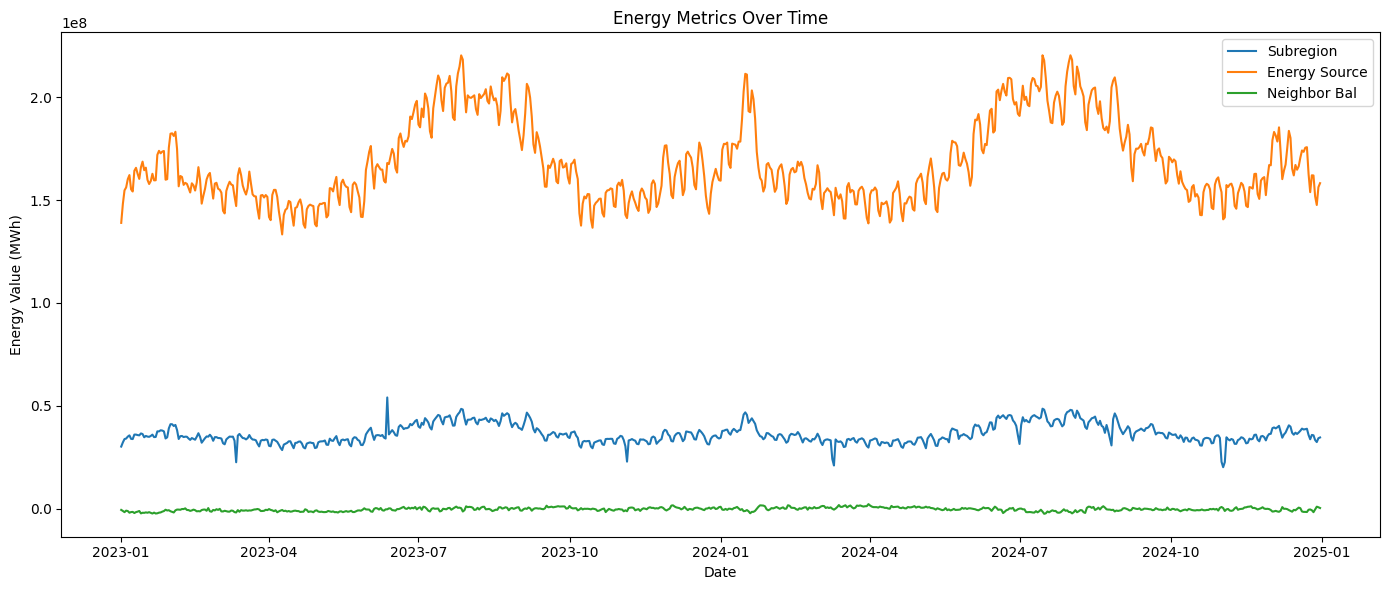

In [14]:
#Energy Values over time

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
for df, label in zip(dfs, ['Subregion', 'Energy Source', 'Neighbor Bal']):
    df.groupby(df['period'].dt.date)['value'].sum().plot(label=label)

plt.title('Energy Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Value (MWh)')
plt.legend()
plt.tight_layout()
plt.show()


Subregion value distribution:


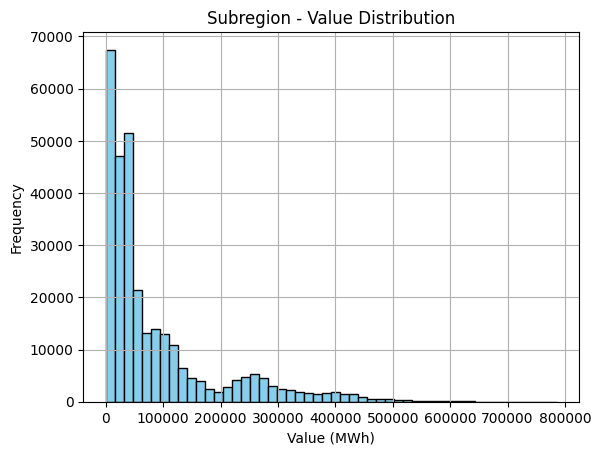


Energy Source value distribution:


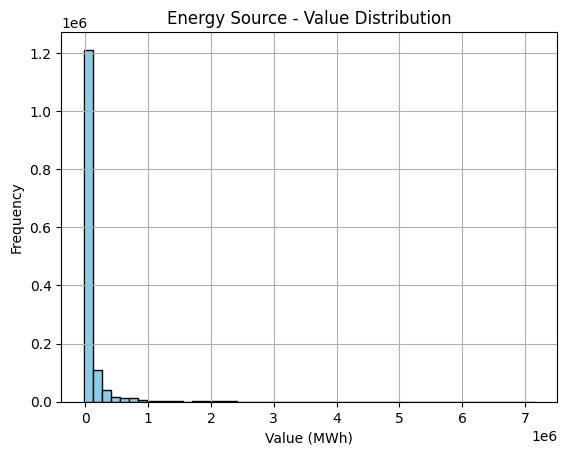


Neighbor Balancing value distribution:


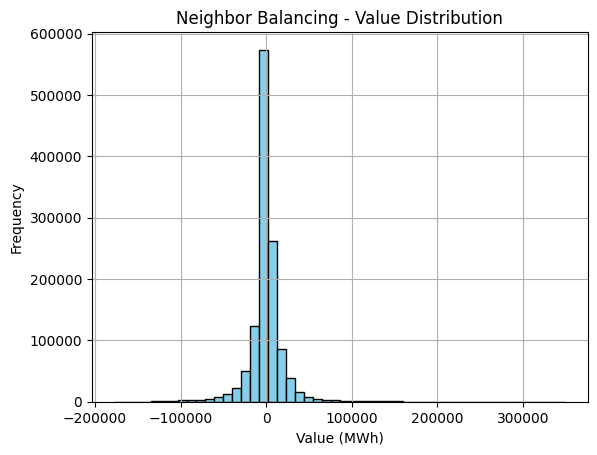

In [15]:
#Value Distribution

for name, df in zip(
    ['Subregion', 'Energy Source', 'Neighbor Balancing'],
    [df_subregion, df_energysource, df_neighbor_bal]
):
    if 'value' in df.columns:
        print(f"\n{name} value distribution:")
        plt.hist(df['value'], bins=50, color='skyblue', edgecolor='black')
        plt.title(f'{name} - Value Distribution')
        plt.xlabel('Value (MWh)')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    else:
        print(f"⚠️ '{name}' has no 'value' column.")


Subregion - Total Value Over Time:


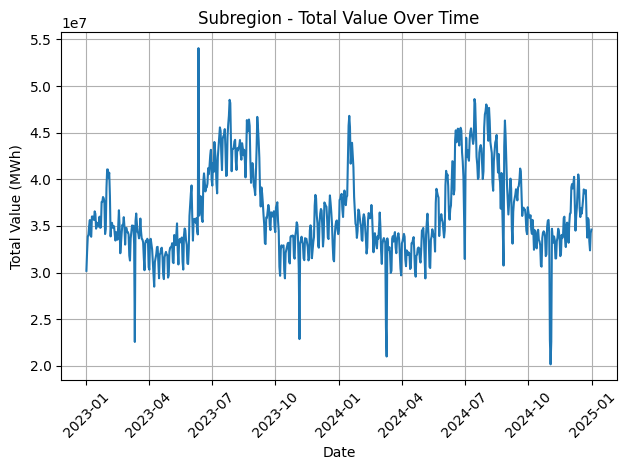


Energy Source - Total Value Over Time:


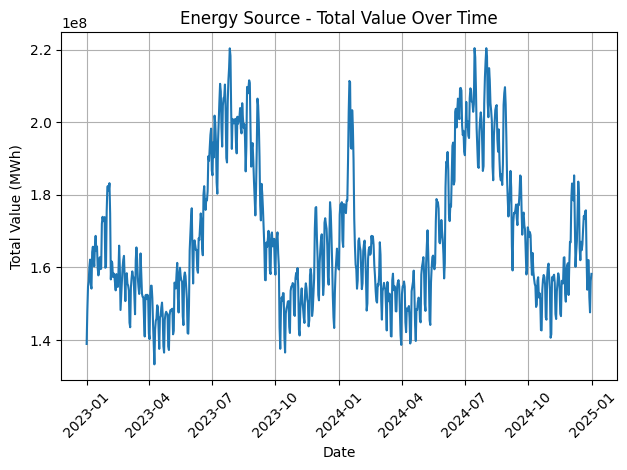


Neighbor Balancing - Total Value Over Time:


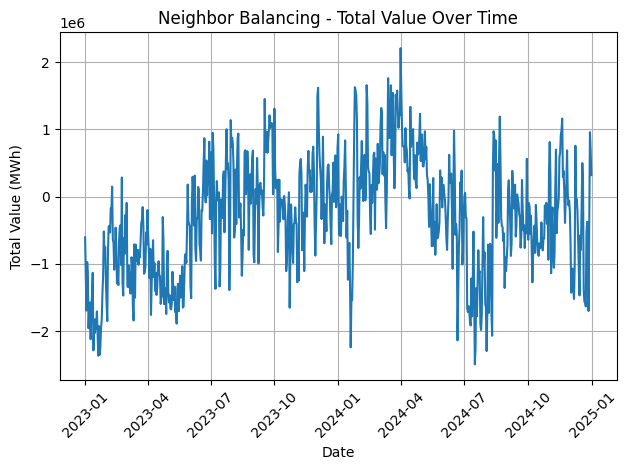

In [16]:
for name, df in zip(
    ['Subregion', 'Energy Source', 'Neighbor Balancing'],
    [df_subregion, df_energysource, df_neighbor_bal]
):
    if 'value' in df.columns:
        print(f"\n{name} - Total Value Over Time:")
        df_time = df.copy()
        df_time['period'] = pd.to_datetime(df_time['period'])
        
        df_time_grouped = df_time.groupby('period')['value'].sum().reset_index()

        plt.plot(df_time_grouped['period'].values, df_time_grouped['value'].values)
        plt.title(f'{name} - Total Value Over Time')
        plt.xlabel('Date')
        plt.ylabel('Total Value (MWh)')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [17]:
#merge "value" across all datasets

df_subregion_time = df_subregion.groupby('period')['value'].sum().reset_index()
df_energysource_time = df_energysource.groupby('period')['value'].sum().reset_index()
df_neighbor_time = df_neighbor_bal.groupby('period')['value'].sum().reset_index()

In [18]:
#merge for plotting

merged = df_subregion_time.merge(df_energysource_time, on='period', suffixes=('_subregion', '_energysource'))
merged = merged.merge(df_neighbor_time, on='period')
merged.rename(columns={'value': 'value_neighbor'}, inplace=True)

In [19]:
print(merged.columns)
print(merged.dtypes)

Index(['period', 'value_subregion', 'value_energysource', 'value_neighbor'], dtype='object')
period                datetime64[ns]
value_subregion                int64
value_energysource             int64
value_neighbor                 int64
dtype: object


In [20]:
if not hasattr(np, 'bool'):
    np.bool = bool

/tmp/ipykernel_4190/1910871373.py:1: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, 'bool'):


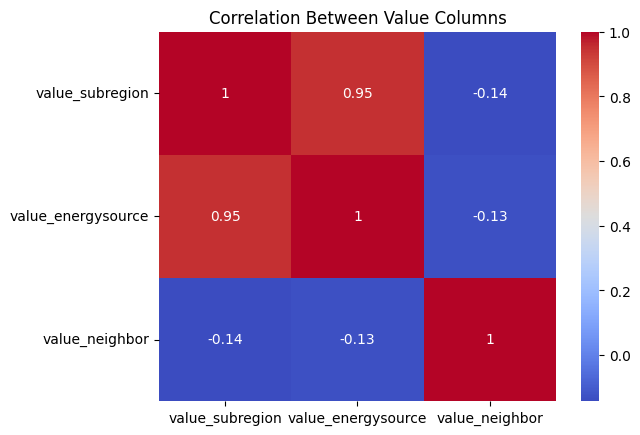

In [21]:
correlation_matrix = merged[['value_subregion', 'value_energysource', 'value_neighbor']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Value Columns')
plt.show()

## Load dataframe into aws athena database

In [22]:
athena = boto3.client('athena')

# Set parameters
database_name = 'ecodataaidatabase'
output_location = "s3://ecogridaidata/eia_electricity/"

In [23]:
# Ingest data for bias

In [24]:
# Prepare dataset for training